## Final Project Submission

Please fill out:
* Student name: Brian Kiptoo
* Student pace: full time
* Scheduled project review date/time: N/A
* Instructor name: Nikita Njoroge
* Blog post URL: N/A


Film Industry Analysis for Microsoft Movie Studio

Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

Objectives

a. Research current film trends and analyze box office success of various movie genres.

b. Identify the most profitable and popular movie genres in the market.

c. Develop a list of recommendations for Microsoft's new movie studio based on the research findings.

d. Present a comprehensive report of the research findings and recommendations to the head of the new movie studio.


1. Importing Libraries.

In [358]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Data
The datasets are stored in the 'zippedData' folder and were sourced from:

1. Box Office MojoLinks
    > bom.movie_gross.csv
2. IMDBLinks
    > im.db
3. Rotten TomatoesLinks
    > rt.movie_info.tsv
4. TheMovieDBLinks
    > tmdb.movies.csv
5. The Numbers
    > tn.movie_budget.csv


2. Loading Data from Datasets

2.1 loadind data from Box Office Mojo

In [359]:
#load data from Box Office MojoLinks
movies_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movies_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


2.2 Loading data from The Numbers

In [360]:
#Load the data from tn.movie_budgets.csv into a dataframe
movies_budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
movies_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


2.3 Loading data from TheMovieDBLinks

In [361]:
tmd = pd.read_csv('zippedData/tmdb.movies.csv.gz',index_col=0)
tmd

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


2.4 Loading data from reviews

In [362]:
reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter='\t',encoding='unicode_escape')
reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


2.5 Loading data from Rotten Tomatoes Links

In [363]:
movies_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t',encoding='unicode_escape')
movies_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


2.6 Loading Data from IMDB Links

In [364]:
# import the zipfile module to help unzip the data
import zipfile

# extract files from 'im.db.zip' to the current working directory
with zipfile.ZipFile('zippedData/im.db.zip','r') as zip_ref:
    zip_ref.extractall(path='zippedData')

# creating a connection to the database
conn = sqlite3.connect('zippedData/im.db')

we will now read this dataset and extract two tables we are interested in for analysis and assign them to the variables: movie_basics and movie_ratings

In [365]:
movie_basics = pd.read_sql("SELECT* FROM movie_basics;",conn)
movie_rating = pd.read_sql("SELECT* FROM movie_ratings;",conn)

print(movie_basics)

         movie_id                                primary_title  \
0       tt0063540                                    Sunghursh   
1       tt0066787              One Day Before the Rainy Season   
2       tt0069049                   The Other Side of the Wind   
3       tt0069204                              Sabse Bada Sukh   
4       tt0100275                     The Wandering Soap Opera   
...           ...                                          ...   
146139  tt9916538                          Kuambil Lagi Hatiku   
146140  tt9916622  Rodolpho Teóphilo - O Legado de um Pioneiro   
146141  tt9916706                              Dankyavar Danka   
146142  tt9916730                                       6 Gunn   
146143  tt9916754               Chico Albuquerque - Revelações   

                                     original_title  start_year  \
0                                         Sunghursh        2013   
1                                   Ashad Ka Ek Din        2019   
2     

In [366]:
print(movie_rating)

         movie_id  averagerating  numvotes
0      tt10356526            8.3        31
1      tt10384606            8.9       559
2       tt1042974            6.4        20
3       tt1043726            4.2     50352
4       tt1060240            6.5        21
...           ...            ...       ...
73851   tt9805820            8.1        25
73852   tt9844256            7.5        24
73853   tt9851050            4.7        14
73854   tt9886934            7.0         5
73855   tt9894098            6.3       128

[73856 rows x 3 columns]


3. Cleaning Data

3.1 We will now clean data from Box Office Mojo

In [367]:
# To get the first 5 rows
movies_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [368]:
# summary of Box Office Mojo
movies_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [369]:
# summary of the Box Office Mojo structure and content. 
movies_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [370]:
#To check for duplicates
movies_gross.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3382    False
3383    False
3384    False
3385    False
3386    False
Length: 3387, dtype: bool

In [371]:
#To check for null values
null_count = movies_gross.isnull().sum()
null_count

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [372]:
# To check for total count of null values
total_count = movies_gross.shape[0]
total_count

3387

In [373]:
#To get the percentage of null values
percentage_count =(null_count/total_count)*100 
percentage_count

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

In [374]:
# Drop missing values from studio because they are only 5
movies_gross.dropna(subset= ['studio'], inplace = True)

In [375]:
#To check the summary of bom movie after dropping studio column.
movies_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   2033 non-null   object 
 4   year            3382 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 158.5+ KB


In [376]:
#Convert the data in that column from a string representation of a number with commas
movies_gross['foreign_gross'] = movies_gross['foreign_gross'].str.replace(',','')

In [377]:
# Change data type for column foreign_gross  to float
movies_gross['foreign_gross'] = movies_gross['foreign_gross'].astype(float)

In [378]:
#To check the summary of bom to see if the changes made have reflected
movies_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   2033 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB


In [379]:
#To replace missing values with the mean.
movies_gross['foreign_gross'].fillna(movies_gross['foreign_gross'].mean(), inplace = True)
movies_gross['domestic_gross'].fillna(movies_gross['domestic_gross'].mean(), inplace = True)

In [380]:
#To check the summary of the data if foreign gross column has been replaced with the mean
movies_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   2033 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB


3.2 Cleaning data from The Numbers

In [381]:
#To generate the first 5 rows of movies budget
movies_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [382]:
#To get a summary of the data
movies_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [383]:
# To convert columns from strings to float values while removing any non-numeric characters
float_values= ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in float_values:
    movies_budget[col] = movies_budget[col].str.replace(r'\D', '', regex = True).astype(float)
movies_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [384]:
#To get a summary of movie budget after making changes
movies_budget.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [385]:
# Checking duplicates on movie column by parsing a function
def duplicates(data, column):

    new_duplicates = []
    for i in data[column].duplicated():
        new_duplicates.append(i)

    new_duplicates_set = set(new_duplicates)
    if (len(new_duplicates_set) == 1):
        print(f"The column {column.title()} has no duplicates")
    else:
        no_true = 0
        for val in new_duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        new_duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        print(f"The column {column.title()} has {no_true} duplicated rows.\nThis constitutes {new_duplicates_percentage}% of the data set.")
duplicates(movies_budget, 'movie')

The column Movie has 84 duplicated rows.
This constitutes 1.453% of the data set.


In [386]:
#Checking for duplicates in ID column by parsing a function
def duplicates(data, column):

    new_duplicates = []
    for i in data[column].duplicated():
        new_duplicates.append(i)

    new_duplicates_set = set(new_duplicates)
    if (len(new_duplicates_set) == 1):
        print(f"The column {column.title()} has no duplicates")
    else:
        no_true = 0
        for val in new_duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        new_duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        print(f"The column {column.title()} has {no_true} duplicated rows.\nThis constitutes {new_duplicates_percentage}% of the data set.")
duplicates(movies_budget, 'id')

The column Id has 5682 duplicated rows.
This constitutes 98.27% of the data set.


In [387]:
#Dropping duplicated columns
movies_budget.drop_duplicates(subset= "movie", keep="first", inplace=True)

In [388]:
#To get summary of statistics after dropping duplicates
movies_budget.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5698 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5698 non-null   int64  
 1   release_date       5698 non-null   object 
 2   movie              5698 non-null   object 
 3   production_budget  5698 non-null   float64
 4   domestic_gross     5698 non-null   float64
 5   worldwide_gross    5698 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 311.6+ KB


3.3 Cleaning data from TheMovieDB Links

In [389]:
# check the first 5 rows
tmd.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [390]:
# To get summary of the data
tmd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [391]:
# To get the count of languages
tmd['original_language'].value_counts()

original_language
en    23291
fr      507
es      455
ru      298
ja      265
      ...  
bo        1
si        1
sl        1
hz        1
dz        1
Name: count, Length: 76, dtype: int64

In [392]:
# checking the number of duplicates
tmd.duplicated().sum()

1020

In [393]:
#drop all duplicate rows based on the titles columns
tmd = tmd.drop_duplicates(subset = ['title','original_title'], keep = 'first')
tmd.info()


<class 'pandas.core.frame.DataFrame'>
Index: 24842 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          24842 non-null  object 
 1   id                 24842 non-null  int64  
 2   original_language  24842 non-null  object 
 3   original_title     24842 non-null  object 
 4   popularity         24842 non-null  float64
 5   release_date       24842 non-null  object 
 6   title              24842 non-null  object 
 7   vote_average       24842 non-null  float64
 8   vote_count         24842 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.9+ MB


In [394]:
# check for duplicates
tmd.duplicated().sum()

0

In [395]:
# check for non values
tmd.isnull().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

3.4 Cleaning data from reviews

In [396]:
# Get the first 5 rows
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [397]:
# Get the summary of reviews
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [398]:
# check for non values
null_count = reviews.isnull().sum()
null_count

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [399]:
# check for duplicates
reviews.duplicated().sum()

9

In [400]:
# Drop the duplicates
reviews.dropna(axis=0, inplace = True)

3.5 Cleaning data from Rotten Tomatoes Links

In [401]:
# To get the first 5 rows
movies_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [402]:
# To get the summary 
movies_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [403]:
# To check for non values
null_count = movies_info.isnull().sum()
null_count

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [404]:
# Drop the non values
movies_info.dropna(inplace = True)

In [405]:
# summary afer change
movies_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 1 to 1545
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            235 non-null    int64 
 1   synopsis      235 non-null    object
 2   rating        235 non-null    object
 3   genre         235 non-null    object
 4   director      235 non-null    object
 5   writer        235 non-null    object
 6   theater_date  235 non-null    object
 7   dvd_date      235 non-null    object
 8   currency      235 non-null    object
 9   box_office    235 non-null    object
 10  runtime       235 non-null    object
 11  studio        235 non-null    object
dtypes: int64(1), object(11)
memory usage: 23.9+ KB


In [406]:
# check for duplicates
movies_info.duplicated().sum()

0

3.6 Cleaning data from IMDB Links

3.6.1 Cleaning data from movie_rating

In [407]:
# Get the first 5 rows
movie_rating.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [408]:
#Get the summary
movie_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [409]:
# check for non values
movie_rating.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [410]:
# check for duplicates
movie_rating.duplicated().sum()

0

3.6.2 Cleaning data from movie_basics

In [411]:
# Get the first 5 rows
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [412]:
# Get the summary
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [413]:
# check for non values
movie_basics.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [414]:
# drop the non values
movie_basics.dropna(inplace = True)

In [415]:
# check for non values
movie_basics.isnull().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [416]:
# check for duplicates
movie_basics.duplicated().sum()

0

4. Merging data


In [417]:
#renaming the column for merging
pd.options.mode.copy_on_write = True 

movies_gross.rename(columns={'title':'movie'}, inplace=True)
tmd.rename(columns={'original_title':'movie'}, inplace=True)
movie_basics.rename(columns={'original_title':'movie'},inplace=True)

In [418]:
#merging the movie_budget dataframe and movie_gross 

df_budget_and_gross = movies_budget.merge(movies_gross, how = 'inner', on ='movie')

In [419]:
df_budget_and_gross.shape

(1237, 10)

Merging tmd dataframe with the movie_basics table

In [420]:
#merge tmd with movie basics to get common languages

popularity_ratings_df = tmd.merge(movie_basics, how = 'inner', on ='movie')

In [421]:
popularity_ratings_df.shape

(16546, 14)

In [422]:
final_df = pd.merge(df_budget_and_gross,popularity_ratings_df, how = 'inner', on ='movie')
final_df.head()

,id_x,release_date_x,movie,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year,...,popularity,release_date_y,title,vote_average,vote_count,movie_id,primary_title,start_year,runtime_minutes,genres
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,BV,241100000.0,804600000.0,2011,...,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,BV,459000000.0,946400000.0,2015,...,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457,tt2395427,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,BV,678800000.0,1369.5,2018,...,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
3,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,WB,229000000.0,428900000.0,2017,...,34.953,2017-11-17,Justice League,6.2,7510,tt0974015,Justice League,2017,120.0,"Action,Adventure,Fantasy"
4,10,"Nov 6, 2015",Spectre,300000000.0,200074175.0,8.796209e+08,Sony,200100000.0,680600000.0,2015,...,30.318,2015-11-06,Spectre,6.4,6719,tt2379713,Spectre,2015,148.0,"Action,Adventure,Thriller"


In [423]:
final_df.shape

(1396, 23)

In [424]:
#finding the column names
list(final_df.columns)

['id_x',
 'release_date_x',
 'movie',
 'production_budget',
 'domestic_gross_x',
 'worldwide_gross',
 'studio',
 'domestic_gross_y',
 'foreign_gross',
 'year',
 'genre_ids',
 'id_y',
 'original_language',
 'popularity',
 'release_date_y',
 'title',
 'vote_average',
 'vote_count',
 'movie_id',
 'primary_title',
 'start_year',
 'runtime_minutes',
 'genres']

Dropping unnecessary columns

In [425]:
# dropping the unnecessary columns

final_df.drop(columns=['id_x', 'release_date_x', 'domestic_gross_x','domestic_gross_y', 'genre_ids', 'id_y', 'release_date_y','movie_id','primary_title','start_year'],inplace= True)
final_df.head()

,movie,production_budget,worldwide_gross,studio,foreign_gross,year,original_language,popularity,title,vote_average,vote_count,runtime_minutes,genres
0,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09,BV,804600000.0,2011,en,30.579,Pirates of the Caribbean: On Stranger Tides,6.4,8571,136.0,"Action,Adventure,Fantasy"
1,Avengers: Age of Ultron,330600000.0,1.403014e+09,BV,946400000.0,2015,en,44.383,Avengers: Age of Ultron,7.3,13457,141.0,"Action,Adventure,Sci-Fi"
2,Avengers: Infinity War,300000000.0,2.048134e+09,BV,1369.5,2018,en,80.773,Avengers: Infinity War,8.3,13948,149.0,"Action,Adventure,Sci-Fi"
3,Justice League,300000000.0,6.559452e+08,WB,428900000.0,2017,en,34.953,Justice League,6.2,7510,120.0,"Action,Adventure,Fantasy"
4,Spectre,300000000.0,8.796209e+08,Sony,680600000.0,2015,en,30.318,Spectre,6.4,6719,148.0,"Action,Adventure,Thriller"


In [426]:
final_df.tail()

,movie,production_budget,worldwide_gross,studio,foreign_gross,year,original_language,popularity,title,vote_average,vote_count,runtime_minutes,genres
1391,Sound of My Voice,135000.0,429448.0,FoxS,NaN,2012,en,7.212,Sound of My Voice,6.4,169,85.0,"Drama,Mystery,Sci-Fi"
1392,Your Sister's Sister,120000.0,3090593.0,IFC,NaN,2012,en,7.115,Your Sister's Sister,6.6,192,90.0,"Comedy,Drama"
1393,The Gallows,100000.0,41656474.0,WB (NL),20200000.0,2015,en,9.166,The Gallows,4.8,591,81.0,"Horror,Mystery,Thriller"
1394,A Ghost Story,100000.0,2769782.0,A24,NaN,2017,en,11.886,A Ghost Story,7.0,906,92.0,"Drama,Fantasy,Romance"
1395,Tiny Furniture,50000.0,424149.0,IFC,NaN,2010,en,6.695,Tiny Furniture,5.9,82,98.0,"Comedy,Drama,Romance"


In [427]:
# The common language is English so we drop the column
final_df.drop(columns=['title','original_language'],inplace=True)
final_df.head()

,movie,production_budget,worldwide_gross,studio,foreign_gross,year,popularity,vote_average,vote_count,runtime_minutes,genres
0,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09,BV,804600000.0,2011,30.579,6.4,8571,136.0,"Action,Adventure,Fantasy"
1,Avengers: Age of Ultron,330600000.0,1.403014e+09,BV,946400000.0,2015,44.383,7.3,13457,141.0,"Action,Adventure,Sci-Fi"
2,Avengers: Infinity War,300000000.0,2.048134e+09,BV,1369.5,2018,80.773,8.3,13948,149.0,"Action,Adventure,Sci-Fi"
3,Justice League,300000000.0,6.559452e+08,WB,428900000.0,2017,34.953,6.2,7510,120.0,"Action,Adventure,Fantasy"
4,Spectre,300000000.0,8.796209e+08,Sony,680600000.0,2015,30.318,6.4,6719,148.0,"Action,Adventure,Thriller"


In [428]:
# checking for null values

final_df.isna().sum()

movie                  0
production_budget      0
worldwide_gross        0
studio                 0
foreign_gross        199
year                   0
popularity             0
vote_average           0
vote_count             0
runtime_minutes        0
genres                 0
dtype: int64

In [429]:
# check for duplicates
final_df.duplicated().sum()

0

5. Exploratory Data Analysis


In [439]:
final_df.head()

,movie,production_budget,worldwide_gross,studio,foreign_gross,year,popularity,vote_average,vote_count,runtime_minutes,genres
0,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09,BV,804600000.0,2011,30.579,6.4,8571,136.0,"Action,Adventure,Fantasy"
1,Avengers: Age of Ultron,330600000.0,1.403014e+09,BV,946400000.0,2015,44.383,7.3,13457,141.0,"Action,Adventure,Sci-Fi"
2,Avengers: Infinity War,300000000.0,2.048134e+09,BV,1369.5,2018,80.773,8.3,13948,149.0,"Action,Adventure,Sci-Fi"
3,Justice League,300000000.0,6.559452e+08,WB,428900000.0,2017,34.953,6.2,7510,120.0,"Action,Adventure,Fantasy"
4,Spectre,300000000.0,8.796209e+08,Sony,680600000.0,2015,30.318,6.4,6719,148.0,"Action,Adventure,Thriller"


In [430]:
# find the popular genre
popular = final_df.sort_values('popularity', ascending = False)
popular

,movie,production_budget,worldwide_gross,studio,foreign_gross,year,popularity,vote_average,vote_count,runtime_minutes,genres
2,Avengers: Infinity War,300000000.0,2.048134e+09,BV,1369.5,2018,80.773,8.3,13948,149.0,"Action,Adventure,Sci-Fi"
624,John Wick,30000000.0,7.623500e+07,LG/S,45700000.0,2014,78.123,7.2,10081,101.0,"Action,Crime,Thriller"
14,The Hobbit: The Battle of the Five Armies,250000000.0,9.455776e+08,WB (NL),700900000.0,2014,53.783,7.3,8392,144.0,"Adventure,Fantasy"
70,Guardians of the Galaxy,170000000.0,7.708675e+08,BV,440200000.0,2014,49.606,7.9,17958,121.0,"Action,Adventure,Comedy"
47,Blade Runner 2049,185000000.0,2.593574e+08,WB,167200000.0,2017,48.571,7.4,6679,164.0,"Drama,Mystery,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...
552,Adrift,35000000.0,5.789719e+07,STX,28500000.0,2018,0.600,7.0,1,96.0,"Action,Adventure,Biography"
551,Adrift,35000000.0,5.789719e+07,STX,28500000.0,2018,0.600,7.0,1,85.0,Romance
1194,The Lazarus Effect,5000000.0,3.835931e+07,Rela.,12600000.0,2015,0.600,4.8,3,83.0,"Horror,Mystery,Sci-Fi"
1291,The D Train,3000000.0,7.723660e+05,IFC,102000.0,2015,0.600,6.0,2,101.0,"Comedy,Drama"


In [431]:
# accessing the individual genre element per row

top_genres = [genre.split(',') for genre in popular['genres']]

top_genres

[['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Crime', 'Thriller'],
 ['Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Comedy'],
 ['Drama', 'Mystery', 'Sci-Fi'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Biography', 'Drama', 'Music'],
 ['Action', 'Mystery', 'Sci-Fi'],
 ['Action', 'Adventure', 'Animation'],
 ['Action', 'Adventure', 'Animation'],
 ['Biography', 'Comedy', 'Drama'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Biography', 'Drama', 'Thriller'],

In [432]:
# accessing all genre elements in the rows

top_genres_list = [genre_ for element in top_genres  for genre_ in element]

top_genres_list   

['Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Crime',
 'Thriller',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Comedy',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Adventure',
 'Family',
 'Fantasy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Biography',
 'Drama',
 'Music',
 'Action',
 'Mystery',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Animation',
 'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Drama',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Biography',
 'Drama',
 'Thriller',


In [433]:
# get the unique genres

unique_genres = []

for genre_ in top_genres_list:
    if genre_ not in unique_genres:
        unique_genres.append(genre_)

In [434]:
# count the number of times the unique genre appeared.
#import Counter
from collections import Counter

count_1 = Counter(top_genres_list)
count_1

Counter({'Drama': 695,
         'Comedy': 446,
         'Action': 364,
         'Adventure': 297,
         'Thriller': 233,
         'Crime': 195,
         'Romance': 171,
         'Horror': 154,
         'Biography': 134,
         'Mystery': 111,
         'Sci-Fi': 106,
         'Fantasy': 101,
         'Animation': 88,
         'Documentary': 85,
         'Family': 77,
         'History': 44,
         'Music': 40,
         'Sport': 30,
         'War': 11,
         'Western': 8,
         'Musical': 4,
         'News': 2})

In [435]:
# separating the genres and the count

genre = []
count = []

for key, values in count_1.items():
    genre.append(key)
    count.append(values)

6. Data Visualization

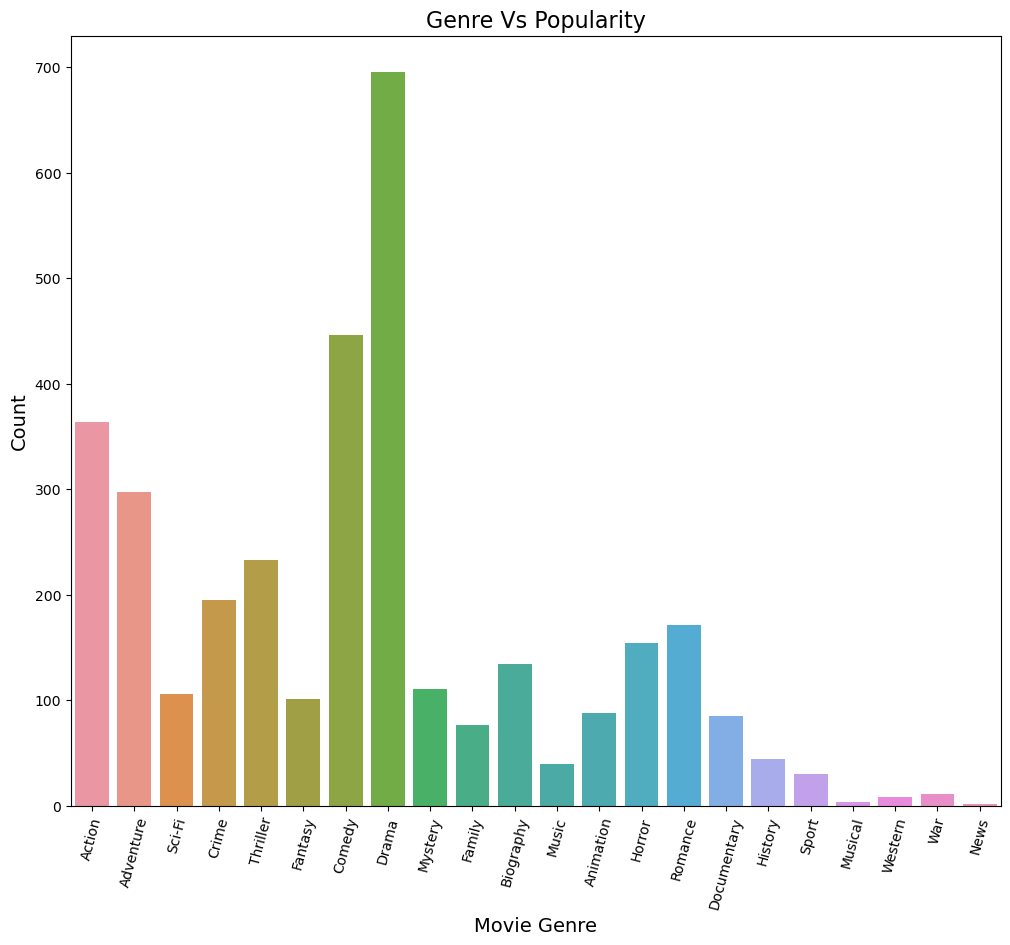

In [436]:
# plotting the data above


fig, ax = plt.subplots(figsize=(12,10))

x = genre
y = count

ax = sns.barplot(x = x, y = y, ax = ax)

ax.set_title('Genre Vs Popularity', fontsize=16)
ax.set_xlabel("Movie Genre",fontsize=14)
ax.set_ylabel("Count", fontsize=14);

ax.set_xticklabels(labels = x, rotation = 75)
fig.savefig('Genres Vs Popularity.png');


From the graph above Drama is the most popular genre followed by comedy  then action. News and Musical are the least popular genres

In [437]:
# Your code here - remember to use markdown cells for comments as well!